# Hotel Booking Demand

# Code

## Importing Libraries

In [1]:
# Used for data manipulation and analysis
import pandas as pd
import numpy as np
import random
import calendar

# Used for visualization purposes 
from matplotlib import pyplot as plt
import seaborn as sns

# Used for statistics
from scipy import stats
from scipy.stats import mode
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Used for ANN
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

We have imported a set of libraries and tools for data analysis, machine learning, and deep learning. The version of Python is Jupyter Notebook Version 7.0.8 in Anaconda. 

Pandas is useful for handling structured data. Numpy is a fundamental package for numerical computing in Python which provides support for arrays and matrices along with mathematical functions. Matplotlib is widely used for creating static, animated, and interactive visualizations in Python. Seaborn is based on Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

Scipy contains modules for linear algebra and statistics. Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis. For machine learning and model selection, we have imported 5 packages. Train_test_split is the function for splitting data into training and testing sets. GridSearchCV is used in Hyperparameter tuning with cross-validation. DecisionTreeClassifier is the decision tree algorithm for classification tasks. Metrics is the module for performance evaluation metrics. and confusion_matrix is the function used to compute confusion matrix to evaluate the accuracy of a classification. 

Torch is the core library for PyTorch, which is an open-source deep learning framework. Torch.nn contains the modules and classes to help create and train neural networks. Torch.optim provides various optimization algorithms. Dataset is the abstract class for handling datasets while DataLoader combines a dataset and a sampler, and provides an iterable over the given dataset.

## Answering Questions (from Description of Group Project)

In [2]:
# load the hotel booking dataset into a Pandas DataFrame
hotel_booking_dataset = pd.read_csv("hotel_bookings.csv")

### 1. How Many Bookings Were Cancelled?

is_canceled
0    75166
1    44224
Name: count, dtype: int64
44224 bookings were cancelled.


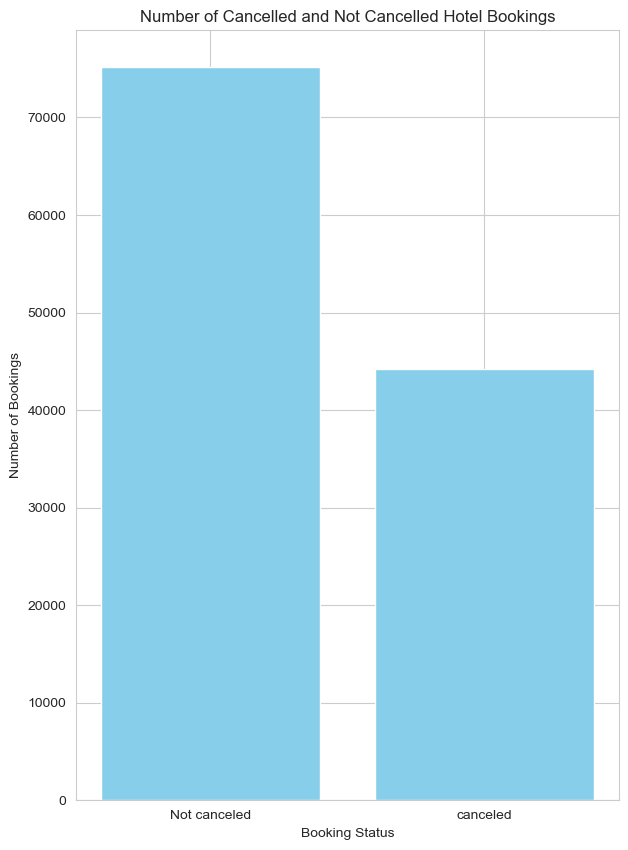

In [3]:
# Count the number of canceled and not canceled bookings
Q1_count = hotel_booking_dataset['is_canceled'].value_counts()     

# Create labels for the plot
Q1_labels = ['Not canceled','canceled']  

# Print the counts
print(Q1_count)     

# Extract the number of canceled bookings
num_canceled_bookings = Q1_count.get(1, 0)  # 1 indicates canceled bookings
print(f"{num_canceled_bookings} bookings were cancelled.")

# Plot the bar chart
plt.figure(figsize=(7,10))
plt.bar(Q1_labels,Q1_count,color='skyblue')
plt.title('Number of Cancelled and Not Cancelled Hotel Bookings')
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.show()

Question 1 asks for the number of bookings that were cancelled. 44224 bookings were cancelled and 75166 bookings were not cancelled. The information is visualize by the bar chart, with two bars representing the counts of canceled and not canceled bookings. This visualization helps us in understanding the proportion of cancellations in the dataset.

### 2. What is the booking ratio between Resort Hotel and City Hotel?

The number of City Hotel is 79330.
The number of Resort Hotel is 40060.
The booking ratio of Resort Hotel:City Hotel is 1:1.9803.


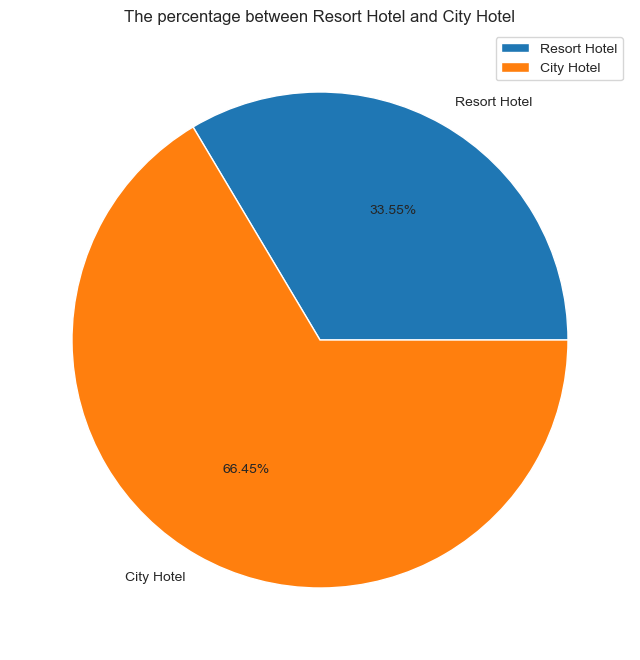

In [4]:
# Define labels
Q2_labels = ['Resort Hotel','City Hotel']

# Initialize counters
count_Resort_Hotel = 0
count_City_Hotel = 0

# Count bookings by hotel type
for value in hotel_booking_dataset['hotel']:
    if value == "Resort Hotel":
        count_Resort_Hotel += 1
    else:
        count_City_Hotel += 1

# Store the counts in a tuple
Q2_count = count_Resort_Hotel,count_City_Hotel

# Print the counts and booking ratio
print(f"The number of City Hotel is {count_City_Hotel}.")
print(f"The number of Resort Hotel is {count_Resort_Hotel}.")
print(f"The booking ratio of Resort Hotel:City Hotel is 1:{round(count_City_Hotel/count_Resort_Hotel,4)}.")

# Visualize the distribution using a pie chart
plt.figure(figsize=(8,10))
plt.pie(Q2_count,labels=Q2_labels,autopct="%1.2f%%")
plt.title("The percentage between Resort Hotel and City Hotel")
plt.legend()
plt.show()

Question 2 asks for the booking ratio between Resort Hotel and City Hotel. The number of City Hotel is 79330, the number of Resort Hotel is 40060 and the booking ratio of Resort Hotel : City Hotel is 1:1.9803. A pie chart is used to display the percentage distribution between Resort Hotel and City Hotel bookings.   

### 3. What is the percentage of booking for each year?

Total bookings:119390
There are 56707 out of 119390 bookings in 2016, which percentage is 47.5%.
There are 40687 out of 119390 bookings in 2017, which percentage is 34.08%.
There are 21996 out of 119390 bookings in 2015, which percentage is 18.42%.


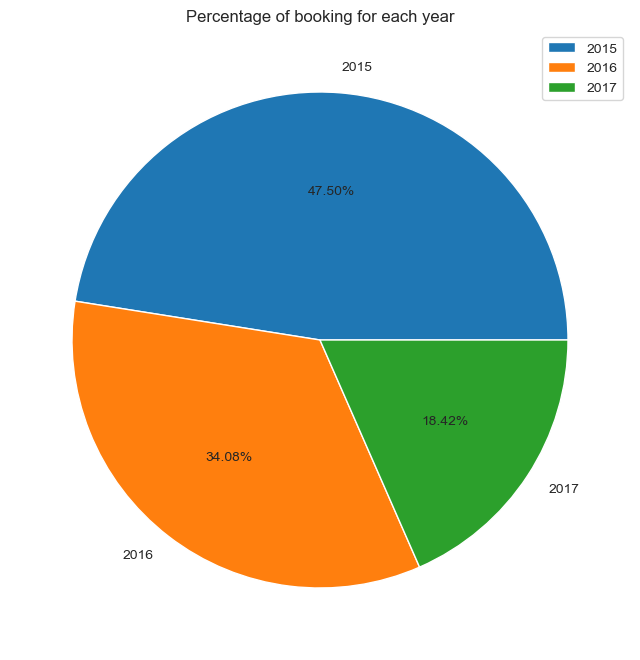

In [5]:
# Count the number of bookings per year
Q3_count = hotel_booking_dataset['arrival_date_year'].value_counts()

# Define labels for the pie chart
Q3_label = ['2015','2016','2017']

# Calculate the total number of bookings
nums = sum(Q3_count)
print(f"Total bookings:{nums}")

# Print the count and percentage of bookings for each year
for year,count in Q3_count.items():
    print(f"There are {count} out of {nums} bookings in {year}, which percentage is {round((count/nums)*100,2)}%.")

# Visualize the distribution using a pie chart
plt.figure(figsize=(8,15))
plt.title('Percentage of booking for each year')
plt.pie(Q3_count,labels=Q3_label,autopct='%1.2f%%')
plt.legend()
plt.show()

Question 3 asks for the percentage of booking for each year. We calculated the number of bookings and the respective percentages for each year from 2015 to 2017 and visualize it using a pie chart. The sum of all bookings across the 3 years is 119,390. In 2016, there are 56,707 bookings, which is 47.5% of the total bookings. In 2017, there are 40,687 bookings, which is 34.08% of the total bookings. In 2015, there are 21,996 bookings, which is 18.42% of the total bookings. This allows us to see the trends and compare the number of bookings over time.

### 4. Which is the busiest month for hotel?

The busiest month for hotel is August : 13877


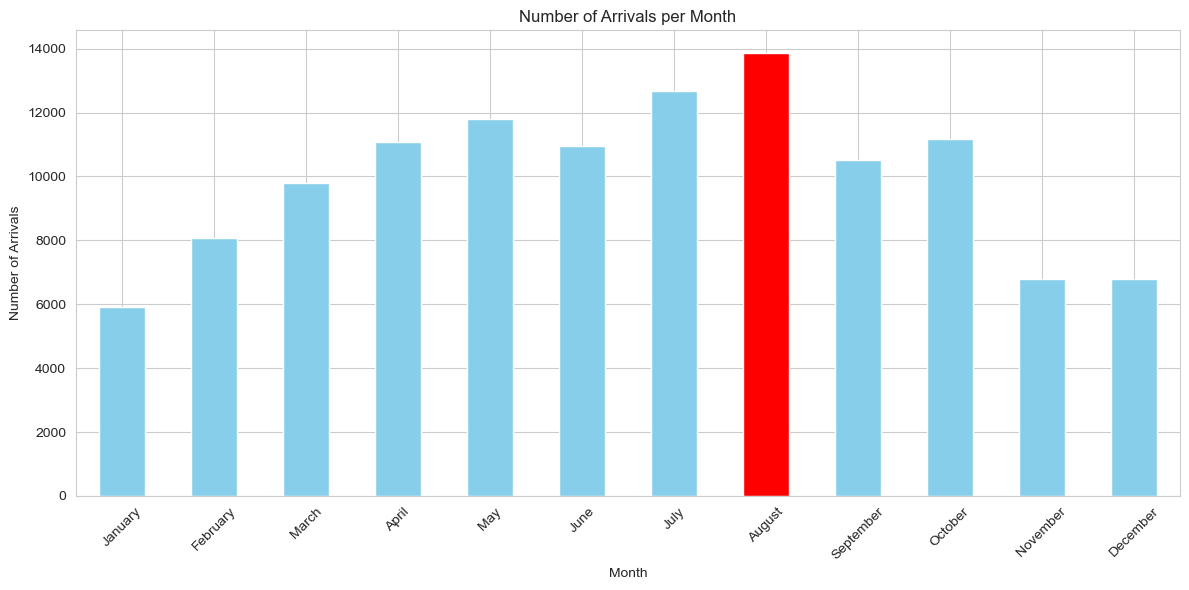

In [6]:
# Count the number of arrivals per month
Q4_count = hotel_booking_dataset['arrival_date_month'].value_counts()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Identify the busiest month and its count
busiest_month = Q4_count.idxmax()
busiest_month_count = Q4_count.max()
print(f"The busiest month for hotel is {busiest_month} : {busiest_month_count}")

# Reindex the count series to match the month order
Q4_count = Q4_count.reindex(month_order)

# Set the colors for the bar chart, highlighting the busiest month
colors = ['red' if month == busiest_month else 'skyblue' for month in month_order]

# Plot the bar chart
plt.figure(figsize=(12, 6))
Q4_count.plot(kind='bar', color=colors)
plt.title('Number of Arrivals per Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 4 asks for the busiest month for hotel. We counted the number of arrivals per month, identified the busiest month, and visualized the data using a bar chart. The bar representing the busiest month which is August will be colored red while the others will be sky blue. This helps in understanding the monthly distribution of hotel arrivals and identifying peak seasons.

### 5. From which country most guest come?

The country most guest come from is PRT : 48590


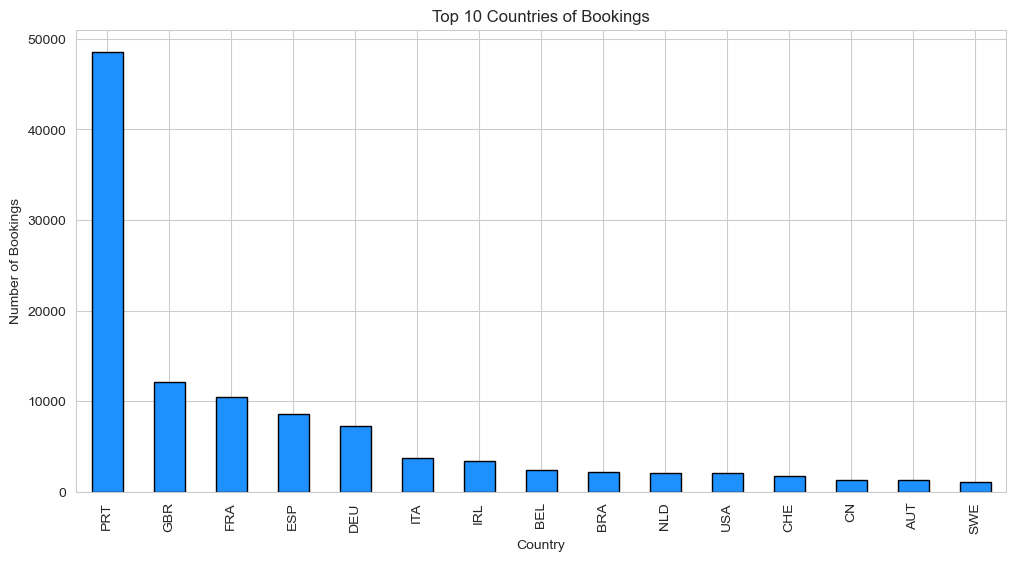

In [7]:
# Count the number of guests per country
Q5_count = hotel_booking_dataset['country'].value_counts()

# Select the top 15 countries
Q5_label_top10 = Q5_count.head(15)

# Identify the country with the most guests and its count
country = Q5_count.idxmax()
country_count = Q5_count.max()
print(f"The country most guest come from is {country} : {country_count}")

# Plot the bar chart for the top 15 countries
plt.figure(figsize=(12, 6))
Q5_label_top10.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Top 10 Countries of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

Question 5 asks from which country most guest come. Portugal is the country from which the most guests come, with 48,590 bookings in the dataset. The bar chart displays the top 15 countries with the highest number of bookings. This helps in understanding the geographical distribution of hotel guests.

### 6. How Long People Stay in the hotel?

The average stay of people in the hotel are 3.43 nights. 


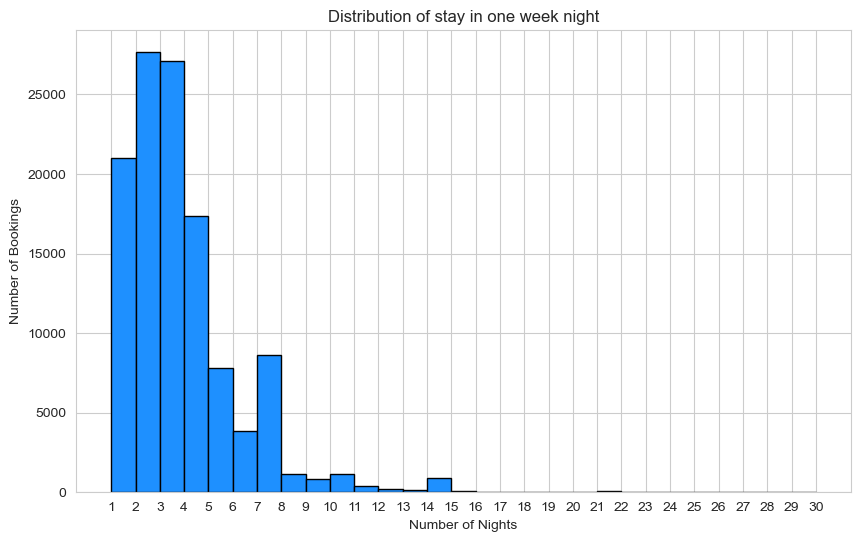

In [8]:
# Calculate the average stay for weekdays and weekends
average_night1 = hotel_booking_dataset['stays_in_week_nights'].mean()
average_night2 = hotel_booking_dataset['stays_in_weekend_nights'].mean()
sum_night = average_night1 + average_night2
print(f"The average stay of people in the hotel are {round(sum_night,2)} nights. ")

# Plot the histogram for the distribution of total stay duration
plt.figure(figsize=(10, 6))
plt.hist(hotel_booking_dataset['stays_in_week_nights'] + hotel_booking_dataset['stays_in_weekend_nights'], bins=range(1, 31), color='dodgerblue', edgecolor='black')
plt.title('Distribution of stay in one week night')
plt.xlabel('Number of Nights')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 31))
plt.show()

Question 6 asks for the duration of people staying in the hotel. The code calculates the mean number of nights for weekdays and weekends separately and then sums these to get the average total stay duration. The histogram then visualizes the distribution of the total stay duration, helping us to understand the average stay duration and the distribution of stay lengths among guests.

### 7. Which was the most booked accommodation type (Single, Couple, Family)?

The most booked accommodation type is Couple.


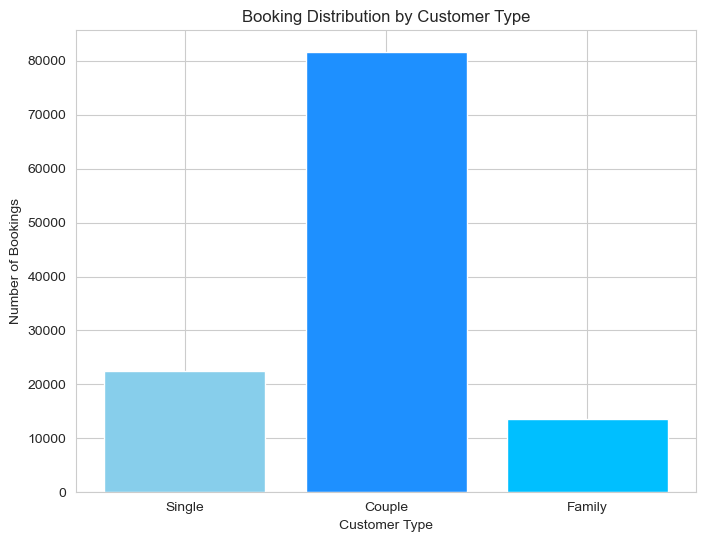

In [9]:
# Counting each customer type
# Single: Only one adult and no children or babies
# Couple: Two adults and no children or babies
# Family: Includes various combinations of adults, children, and babies:
        # Three adults with no children or babies
        # Two adults with one child and no babies
        # Two adults with two children and no babies
        # Two adults with no children and one baby
single_count = ((hotel_booking_dataset['adults'] == 1) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 0)).sum()
couple_count = ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 0)).sum()
family_count = (((hotel_booking_dataset['adults'] == 3) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 0)) | 
               ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 1) & (hotel_booking_dataset['babies'] == 0)) | 
               ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 2) & (hotel_booking_dataset['babies'] == 0)) | 
               ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 1))).sum()

# Total number of bookings
total_bookings = hotel_booking_dataset.shape[0]

# Calculating percentages
single_percentage = single_count / total_bookings * 100
couple_percentage = couple_count / total_bookings * 100
family_percentage = family_count / total_bookings * 100

# Creating a dictionary to hold counts of each accommodation type
accommodation_counts = {'Single': single_count, 'Couple': couple_count, 'Family': family_count}

# Determining which type is most booked
most_booked_type = max(accommodation_counts, key=accommodation_counts.get)

# Outputting the most booked type
print(f"The most booked accommodation type is {most_booked_type}.")

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.bar(['Single', 'Couple', 'Family'], [single_count, couple_count, family_count], color=['skyblue', 'dodgerblue', 'deepskyblue'])
plt.title('Booking Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.show()

Question 7 asks for the most booked accommodation type. From our understanding and anlysis from the dataset, we assummed Single, Couple and Family as different room types provided by the hotel. Single is used to identify bookings with one adult and no children or babies. Couple is used to identify bookings with two adults and no children or babies. Family is used to identify bookings based on different combinations of adults, children, and babies.
The most booked accommodation type is Couple type. A bar chart is used to visualize the distribution of bookings by customer type.

## Data Analysis

### Bubble Chart

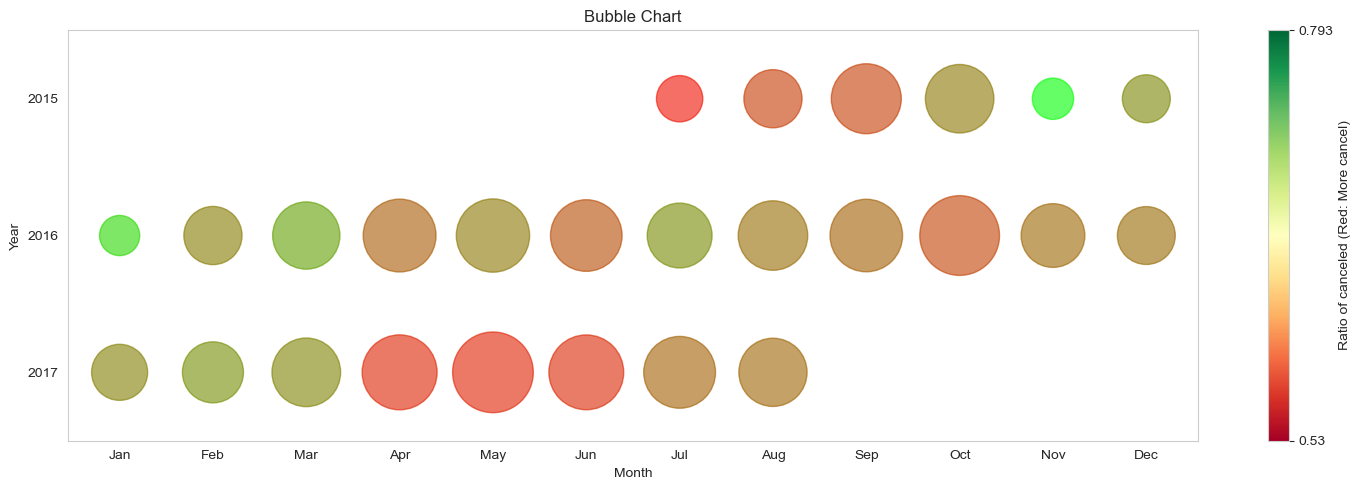

In [10]:
# Create a copy of the necessary columns
df = hotel_booking_dataset[['is_canceled','arrival_date_year', 'arrival_date_month']].copy()

# Convert month names to numbers
df['MonthNum'] = df['arrival_date_month'].map(lambda x: list(calendar.month_name).index(x))

# Group by year and month, then calculate the count of 1s and total count
grouped = df.groupby(['arrival_date_year', 'MonthNum']).agg({
    'is_canceled': ['sum', 'count']
}).reset_index()

# Rename columns
grouped.columns = ['Year', 'Month', 'Label1_1', 'Count']
grouped['Label1_2'] = grouped['Count'] - grouped['Label1_1']

# Create bubble chart
fig, ax = plt.subplots(figsize=(15, 5))


for year in grouped['Year'].unique():

    year_data = grouped[grouped['Year'] == year]
    
    # Calculate colors
    colors = year_data.apply(lambda row: (1 -(row['Label1_2'] / row['Count'] - 0.53)*3.8, (row['Label1_2'] / row['Count'] - 0.53)*3.8, 0), axis=1)
    
    # Plot bubbles
    scatter = ax.scatter(year_data['Month'], [2016*2 - year] * len(year_data), s=year_data['Count'] **1.35 * 0.025, 
                         c=colors.tolist(), alpha=0.6)

# Set axis labels and ticks
ax.set_xticks(range(1, 13))
ax.set_xticklabels(calendar.month_abbr[1:])
ax.set_yticks(grouped['Year'].unique())

ytick_labels = grouped['Year'].unique()[::-1]
ax.set_yticklabels(ytick_labels)

ax.set_xlabel('Month')
ax.set_ylabel('Year')

# Remove grid
ax.grid(False)

# Set title
plt.title('Bubble Chart')

# Add color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='RdYlGn'), ax=ax)
cbar.set_ticks([0,1])
cbar.set_ticklabels([0.53, 0.793])

cbar.set_label('Ratio of canceled (Red: More cancel)')

# Adjust y-axis limits
y_min, y_max = grouped['Year'].min(), grouped['Year'].max()
y_padding = 0.5  # Adjust this value as needed
ax.set_ylim(y_min - y_padding, y_max + y_padding)
plt.tight_layout()

plt.show()

The bubble chart visualizes the number of bookings (bubble size) and their cancellation status (bubble color) by year and month. The dataset is grouped by year and month, calculating the total number of bookings and cancellations. 

The size of the bubbles is scaled by the total number of bookings for a specific year and month. Larger bubbles indicate higher total bookings, while smaller bubbles indicate lower total bookings. In Oct 2016 and May 2017, the two bubbles are significantly larger. This means that demand increased for hotel bookings. This could be due to seasonal peaks, promotional offers, or popular events. In Nov 2015 and Jan 2016, the two bubbles are relatively small, indicating that booking activities decreased. This may occur during off-peak seasons or periods of reduced consumer spending due to economic downturns.

The ratio of cancellations is calculated for each year and month and used to determine the color of the bubbles, with a a custom color calculation applied. A color bar is included to show the mapping of colors to the cancellation ratio, with red indicating a higher cancellation ratio while green indicates lower cancellation ratios. Overall, the bubbles are all green but only in different intensities. Bubbles with darker shades suggest higher values or percentages of the variable being represented, whereas lighter shades indicate lower values or percentages. This means that there are fewer cancellations throughout the 3 years in the dataset. There are no bubbles that are distinctly red or other colors which means there are no outliers which indicate months or years where cancellation ratios were unusually high or low compared to the norm. 

Looking at yearly trends, during April to May and September to October, there is an observed increase in cancellation rates. This period might coincide with seasonal transitions, changes in travel plans, or events leading to uncertain travel plans. Contrary to the above periods, cancellation rates are lower during July to August and November to January. The holiday season and festive celebrations during this period often lead to firmer travel plans and fewer cancellations.

### Feature Correlation Heatmap

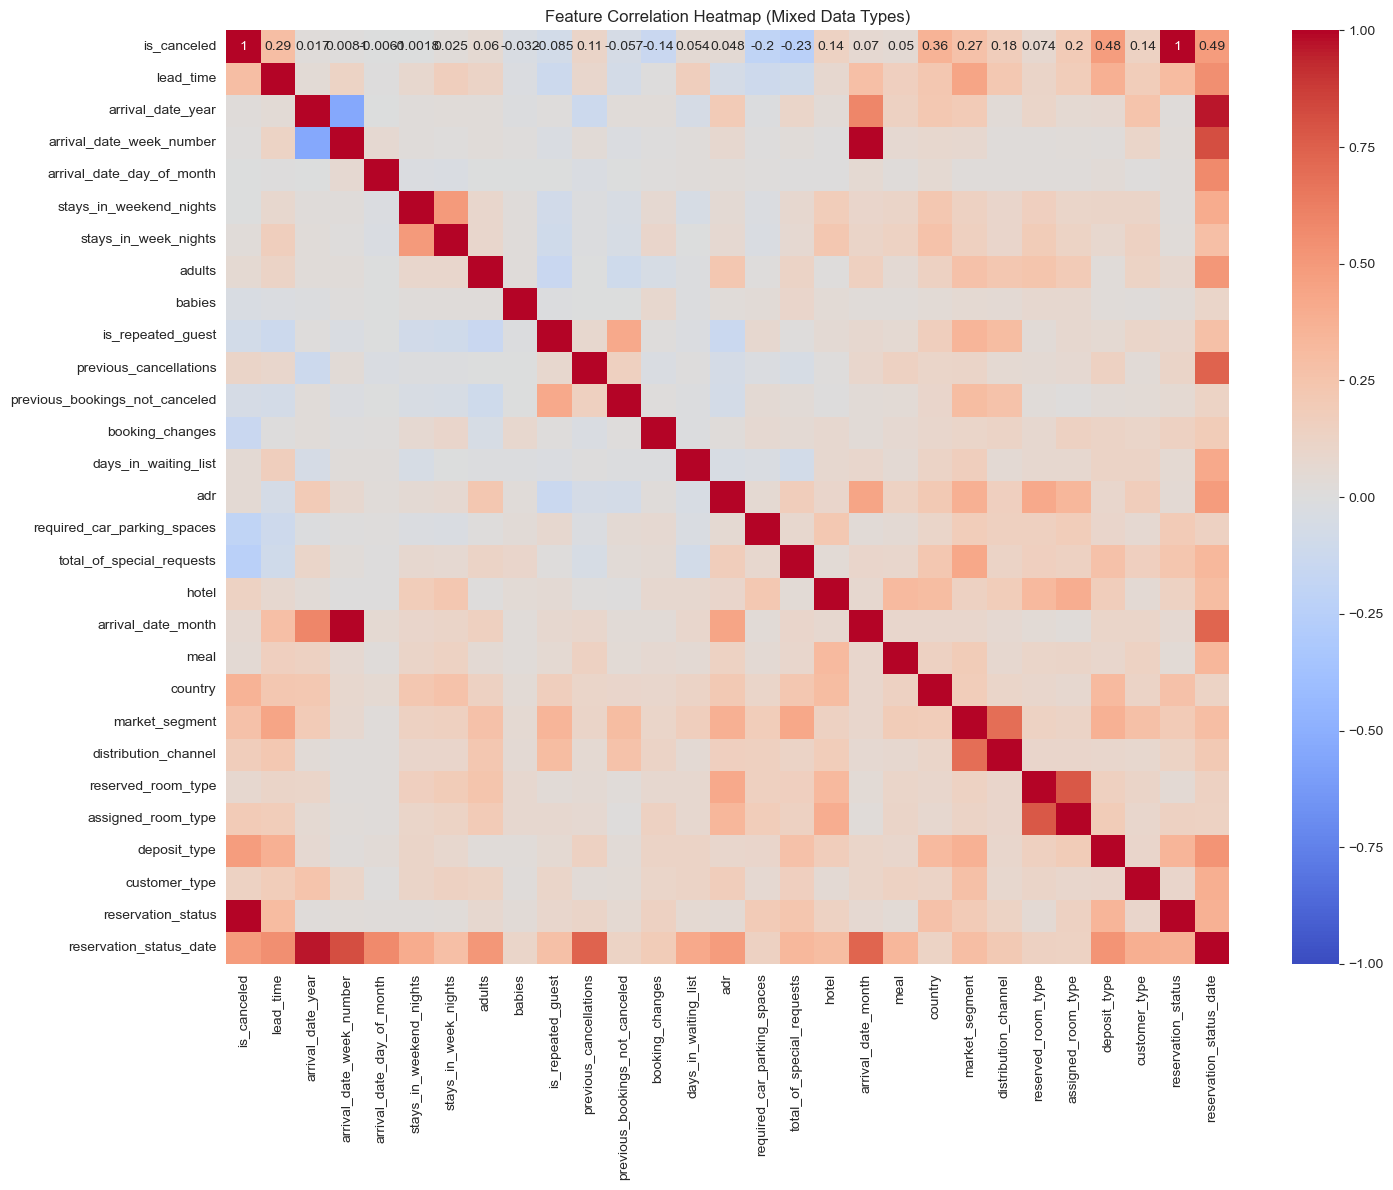

In [11]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

# Read the CSV file

df = hotel_booking_dataset.drop(['children','agent','company'],axis=1).copy()

# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Initialize the correlation matrix with NaN values
all_columns = pd.Index(numeric_columns.tolist() + categorical_columns.tolist())
corr_matrix = pd.DataFrame(np.nan, index=all_columns, columns=all_columns)

# Fill in numeric correlations
corr_matrix.loc[numeric_columns, numeric_columns] = df[numeric_columns].corr()

# Calculate and fill in correlation ratio for categorical vs numeric
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        correlation = correlation_ratio(df[cat_col], df[num_col])
        corr_matrix.loc[cat_col, num_col] = correlation
        corr_matrix.loc[num_col, cat_col] = correlation

# Calculate and fill in Cramer's V for categorical vs categorical
for i, cat_col1 in enumerate(categorical_columns):
    for cat_col2 in categorical_columns[i:]:
        v = cramers_v(df[cat_col1], df[cat_col2])
        corr_matrix.loc[cat_col1, cat_col2] = v
        corr_matrix.loc[cat_col2, cat_col1] = v

# Fill diagonal with 1.0
np.fill_diagonal(corr_matrix.values, 1.0)

# Create a larger figure for better visibility
plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Feature Correlation Heatmap (Mixed Data Types)')

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

The function cramers_v computes Cramer's V for categorical variables, while correlation_ratio calculates the correlation ratio for categorical vs numeric variables. The corr_matrix is initialized and filled with correlations based on data type interactions. Seaborn's heatmap is used for visual representation, annotating each cell with the correlation coefficient using two decimal places. The diagonal of corr_matrix is filled with 1.0 to represent perfect correlation, which means each feature perfectly correlates with itself. 

In a correlation heatmap, colors represent the strength and direction of correlations between pairs of variables. The heatmap visualizes correlations between features, showing positive (red) and negative (blue) correlations, with darker shades indicating stronger correlations. Positive correlation means variables that move in the same direction (both increase or decrease together) while negative correlation means variables that move in opposite directions (one increases while the other decreases). Neutral colors like white or gray indicate no significant correlation between variables.

For example, arrival_date_month and arrival_date_week_number, reservation_status and is_canceled are having strong positive correlations. This indicates that as the month increases (e.g., from January to December), the week number within that month also tends to increase consistently. There is a significant relationship between the reservation status and whether a booking is canceled. It implies that bookings that are marked as canceled in the reservation status are also identified as canceled in the is_canceled variable. Arrival_date_week_number and arrival_date_year are having strong negative correlations. It typically indicates that as the years progress, the week numbers within those years decrease.

Cells shaded white or gray indicate weak correlations between variables. For example, children has weak correlation with hotel, meal, country and so on. This indicates that their impact on each other is less pronounced compared to strongly correlated variables.

## Data Pre-processing

### Step 1: Show Table

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)


The pd.set_option('display.max_columns', None) sets pandas to display all columns without truncation. None means unlimited, so all columns will be shown. The pd.set_option('display.width', 1000) sets the maximum width of the display in characters. If the display exceeds this width, pandas will wrap the output onto the next line. Here, it is set to 1000 characters wide. The pd.set_option('display.float_format', '{:.2f}'.format) sets the format for floating-point numbers in the DataFrame display. Numbers will be displayed with two decimal places. These steps are used for controlling how pandas DataFrame outputs are displayed in the Jupyter Notebook, ensuring that they are readable and formatted consistently.

### Step 2: Import Dataset

In [13]:
# Read the CSV file into a pandas DataFrame
hotel_booking_dataset = pd.read_csv("hotel_bookings.csv")

# Access column names
features_array = hotel_booking_dataset.columns

This code first reads the CSV file hotel_bookings.csv into a pandas DataFrame named hotel_booking_dataset. This code then retrieves the column names (features) of the DataFrame hotel_booking_dataset and stores them in features_array. The hotel_booking_dataset.columns will return an index object containing the column names.

### Step 3: Print Dataset (Column)

In [14]:
print(hotel_booking_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

This line of code will give us a concise summary of the DataFrame, including the number of non-null entries in each column, the data type of each column, and the memory usage of the DataFrame. This output will help us to understand the structure of the DataFrame, the data types of each column, and identify any missing values in the dataset.

### Step 4: Print Dataset (First 5 Rows)

In [15]:
hotel_booking_dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


This line will output the first 5 rows of the hotel_booking_dataset DataFrame, giving us a quick overview of the data, allowing us to see some initial records and get a sense of what each column contains.

### Step 5: Check Missing Value

In [16]:
for i in range(len(features_array)):
    if hotel_booking_dataset[features_array[i]].isnull().any():
        missing_value = hotel_booking_dataset[features_array[i]].isnull().sum()
        print(f"Column '{features_array[i]}' contains {missing_value} null values.")

Column 'children' contains 4 null values.
Column 'country' contains 488 null values.
Column 'agent' contains 16340 null values.
Column 'company' contains 112593 null values.


The code uses a for loop to iterate through each column name and check if there are any null values in the current column. It then calculates the total number of null values in the current column and prints a message indicating the column name and the count of null values if any are found. This helps us to identify which columns have missing values and how many missing values each column contains.

### Step 6: Handle Outliers

In [17]:
# Fill missing values in 'children' column with mode
hotel_booking_dataset["children"].fillna(value=hotel_booking_dataset["children"].mode()[0],inplace=True)

# Convert 'children' column to integer type
hotel_booking_dataset['childzren'] = hotel_booking_dataset['children'].astype('int32')

# Fill missing values in 'country' column with "Unknown
hotel_booking_dataset['country'].fillna("Unknown",inplace=True)

# Fill missing values in 'company' and 'agent' columns with 0
hotel_booking_dataset['company'].fillna(0,inplace=True)
hotel_booking_dataset['agent'].fillna(0,inplace=True)

# Replace 'adr' values of 0 with the mean
adr_mean = hotel_booking_dataset['adr'].mean()
hotel_booking_dataset.loc[hotel_booking_dataset['adr'] == 0,'adr'] = adr_mean

In step 6, we are going to handle the missing values of 5 columns. Firstly, the code calculates the mode of the 'children' column and fills missing values in the 'children' column with the calculated mode value. Secondly, it converts the 'children' column to the integer data type (int32). This assumes that after filling missing values, the column contains only integers. Thirdly, it fills missing values in the 'country' column with the string "Unknown". It then fills missing values in the 'company' and 'agent' columns with the value 0. Lastly, it calculates the mean of the 'adr' column. It locates rows where 'adr' equals 0 and replaces those values with adr_mean. These steps are to ensure that the dataset is ready for analysis or modeling by handling missing values appropriately and ensuring consistent data types. 

### Step 7: Combine features

In [18]:
# Handle cases where both 'stays_in_week_nights' and 'stays_in_weekend_nights' are 0
stay_in_week_night_mode = hotel_booking_dataset['stays_in_week_nights'].mode()[0]
hotel_booking_dataset.loc[((hotel_booking_dataset['stays_in_week_nights'] == 0) & (hotel_booking_dataset['stays_in_weekend_nights'] == 0)),'stays_in_week_nights'] = stay_in_week_night_mode

The code finds the mode of the 'stays_in_week_nights' column. It creates a condition where both 'stays_in_week_nights' and 'stays_in_weekend_nights' are 0. It locates rows that meet the condition and replaces the 'stays_in_week_nights' values with stay_in_week_night_mode. These steps are aimed to handle specific scenarios in the data, such as replacing zero values with meaningful averages or modes. 

### Step 8: Normalization

In [19]:
# Calculate maximum and minimum values
max_lead_time = hotel_booking_dataset['lead_time'].max()
min_lead_time = hotel_booking_dataset['lead_time'].min()
max_adr = hotel_booking_dataset['adr'].max()
min_adr = hotel_booking_dataset['adr'].min()

# Normalize 'lead_time' and 'adr' columns
hotel_booking_dataset['lead_time'] = (hotel_booking_dataset['lead_time'] - min_lead_time)/(max_lead_time-min_lead_time)
hotel_booking_dataset['adr'] = (hotel_booking_dataset['adr'] - min_adr)/(max_adr-min_adr)

These lines compute the maximum and minimum values for the 'lead_time' and 'adr' columns, which are needed for normalization. In the normalization formula, we subtract the minimum value from each value in the column, then dividing by the difference between maximum and minimum values. After these operations, both 'lead_time' and 'adr' columns will be scaled to a range between 0 and 1 based on their respective maximum and minimum values. These steps are to ensure that features are on a similar scale, which can be important for certain machine learning algorithms.

### Step 9: Calculate Number of Days 

In [20]:
def days_since_1Jan(day, month):
    days_in_month = {
        "january": 31,
        "february": 28,
        "march": 31,
        "april": 30,
        "may": 31,
        "june": 30,
        "july": 31,
        "august": 31,
        "september": 30,
        "october": 31,
        "november": 30,
        "december": 31
    }

    # Convert month to lowercase to ensure case-insensitivity
    month = month.lower()

     # Validate the input
    days_count = 0
    for m, days in days_in_month.items():
        if m == month:
            break
        days_count += days

    days_count += (day - 1)

    return days_count 

The days_since_1Jan function is designed to calculate the number of days since January 1st for a given day and month. The days_in_month dictionary defines the number of days in each month. The function converts the month parameter to lowercase to ensure case-insensitivity. It iterates through the months, summing the days until it reaches the specified month. It then adds the days of the specified month to the cumulative total and minus one. The Python's calendar module is used to handle month days more dynamically and improve readability.

### Step 10: 

In [21]:
# Calculate arrival_date as days since January 1st
arr1 = []
for i in range(len(hotel_booking_dataset)):
    arr1.append(days_since_1Jan(hotel_booking_dataset.iloc[i, 6], hotel_booking_dataset.iloc[i, 4]) / 365)
hotel_booking_dataset['arrival_date'] = arr1

hotel_booking_dataset['stays_in_days'] = hotel_booking_dataset['stays_in_week_nights'] + hotel_booking_dataset['stays_in_weekend_nights']

hotel_booking_dataset['room_changed'] = hotel_booking_dataset['reserved_room_type'] != hotel_booking_dataset['assigned_room_type']

hotel_booking_dataset['have_previously_cancelled'] = hotel_booking_dataset['previous_cancellations'] >= 1

hotel_booking_dataset['person_type'] = 'other'
hotel_booking_dataset.loc[(hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 0), 'person_type'] = 'couple'
hotel_booking_dataset.loc[(hotel_booking_dataset['adults'] == 1) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 0), 'person_type'] = 'single'
hotel_booking_dataset.loc[((hotel_booking_dataset['adults'] == 3) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 0)) | 
                          ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 1) & (hotel_booking_dataset['babies'] == 0)) | 
                          ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 2) & (hotel_booking_dataset['babies'] == 0)) | 
                          ((hotel_booking_dataset['adults'] == 2) & (hotel_booking_dataset['children'] == 0) & (hotel_booking_dataset['babies'] == 1)), 'person_type'] = 'family'

hotel_booking_dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,childzren,arrival_date,stays_in_days,room_changed,have_previously_cancelled,person_type
0,Resort Hotel,0,0.46,2015,July,27,1,0,2,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.00,0.00,0,Transient,0.02,0,0,Check-Out,2015-07-01,0,0.50,2,False,False,couple
1,Resort Hotel,0,1.00,2015,July,27,1,0,2,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.00,0.00,0,Transient,0.02,0,0,Check-Out,2015-07-01,0,0.50,2,False,False,couple
2,Resort Hotel,0,0.01,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.00,0.00,0,Transient,0.02,0,0,Check-Out,2015-07-02,0,0.50,1,True,False,single
3,Resort Hotel,0,0.02,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,0.00,0,Transient,0.02,0,0,Check-Out,2015-07-02,0,0.50,1,False,False,single
4,Resort Hotel,0,0.02,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,0.00,0,Transient,0.02,0,1,Check-Out,2015-07-03,0,0.50,2,False,False,couple


### Step 11: 

In [22]:
hotel_booking_dataset = hotel_booking_dataset.drop(columns=['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies','reservation_status', 'deposit_type','reservation_status_date'])
new_feature_array = hotel_booking_dataset.columns
hotel_booking_dataset_before_onehot = hotel_booking_dataset.copy()

### Step 12:

In [23]:
str_feature = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'country']
encoded_features_df = pd.get_dummies(hotel_booking_dataset[str_feature], drop_first=True)
hotel_booking_dataset = hotel_booking_dataset.drop(columns=str_feature)
hotel_booking_dataset = pd.concat([hotel_booking_dataset, encoded_features_df], axis=1)

### Step 13: 

In [24]:
hotel_booking_dataset.shape

(119390, 238)

### Step 14: 

In [25]:
def gini_index(dataset, class_index,n):
    features = dataset.drop(columns=dataset.columns[class_index])
    label = dataset.iloc[:, class_index].squeeze()

    gini_indices = {}

    for feature_name in features.columns:
        feature = dataset[feature_name]
        total_count = dataset.shape[0]
    
        value_counts = pd.crosstab(feature, label)
    
        gini_index_of_sum = 0
    
        for values in value_counts.index:
            feature_value_counts = value_counts.loc[values]
            feature_total = feature_value_counts.sum()
        
            gini_value = 1 - sum((count / feature_total) ** 2 for count in feature_value_counts)
            gini_index_of_sum += gini_value * (feature_total / total_count)
    
        gini_indices[feature_name] = gini_index_of_sum
    
    sorted_gini = sorted(gini_indices.items(), key=lambda item: item[1])

    top_n_features = sorted_gini[:n]
    top_n_feature_names = [feature_name for feature_name,gini in top_n_features]

    reduced_dataset = dataset[top_n_feature_names]

    return reduced_dataset

## Building Models 

### Model 1: Decison Tree

In [26]:
X = gini_index(hotel_booking_dataset,0,10)
y = hotel_booking_dataset['is_canceled']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [27]:
parameters = {'max_depth':range(2,30),'criterion':['gini','entropy'],'max_leaf_nodes':range(2,50),'min_samples_split':range(2,50),'ccp_alpha':[i*0.01 for i in range(0, 100)]}
#clf2 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=15,cv=10)

#clf2.fit(X=X_train, y=Y_train)
#tree_model = clf2.best_estimator_

#print (clf2.best_score_, clf2.best_params_) 

##### 0.8240700155500944 {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 19, 'min_samples_split': 2}

In [28]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(tree_model, 
                   feature_names=X.columns,  
                   class_names=['Not canceled','canceled'],
                   filled=True)

NameError: name 'tree_model' is not defined

<Figure size 5000x4000 with 0 Axes>

In [ ]:
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

print("Confusion Matrix:")
conf_mat = confusion_matrix(Y_test,y_test_pred)
ConfusionMatrixDisplay(conf_mat,display_labels=['Not canceled','Canceled']).plot()
plt.title("Confusion Matrix based on decision tree")
plt.show()

In [ ]:
print("Training Dataset Evaluation")
print(f"Accuracy:{metrics.accuracy_score(Y_train,y_train_pred)}")
print(f"Precision:{metrics.precision_score(Y_train,y_train_pred)}")
print(f"Recall:{metrics.recall_score(Y_train,y_train_pred)}")
print(f"F1 score:{metrics.f1_score(Y_train,y_train_pred)}")

In [ ]:
print("Testing Dataset Evaluation:")
print(f"Accuracy:{metrics.accuracy_score(Y_test,y_test_pred)}")
print(f"Precision:{metrics.precision_score(Y_test,y_test_pred)}")
print(f"Recall:{metrics.recall_score(Y_test,y_test_pred)}")
print(f"F1 score:{metrics.f1_score(Y_test,y_test_pred)}")

### Model 2: Random Forest

In [ ]:
# change month to int form
hong_hotel_dataset= hotel_booking_dataset.copy()
hong_hotel_dataset['month_int'] = pd.to_datetime(hong_hotel_dataset['arrival_date_month'], format='%B').dt.month

hong_hotel_dataset = hong_hotel_dataset.drop('arrival_date_month', axis=1)

# change person type to int form


type_map = {'couple': 2, 'single': 1, 'family': 3, 'other' :4}
hong_hotel_dataset['person_type'] = hong_hotel_dataset['person_type'].map(type_map)

hong_hotel_dataset

In [ ]:
feature_names = hong_hotel_dataset.columns.tolist()
feature_names[1:10]

In [ ]:
# grid search to find the parameter

# for a in range(10, 200, 20):
#     for b in range(10, 80, 10):
#         for c in range(20,100,20):
#             for d in range(5,a//2, 10):
#                 random_forest_dataset = gini_index(hong_hotel_dataset, 0,a)
#                 X_train, X_test, y_train, y_test = train_test_split(random_forest_dataset, hong_hotel_dataset['is_canceled'], test_size=0.1, random_state=42)
#                 X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
#                 random_forest_tree = RandomForest(b, c, X_train, y_train,d)  # max_depth, forest_size, X_train, Y_train, max_features
#                 print(a,b,c,d)
#                 print(f'the train acc :{(random_forest_tree.predict(X_train) == y_train).sum() / len(y_train)}')
#                 print(f'the test acc:{(random_forest_tree.predict(X_test) == y_test).sum() / len(y_test)}')
#                 print('-'*30)

#### Best Parameters:
##### Total Feature = 90
##### Max Depth = 40
##### Forest Size = 40
##### Max Feature for Each Note = 35


In [ ]:
class RandomForest:
    def __init__(self, max_depth, forest_size, X_train, Y_train, max_features):
        self.max_depth = max_depth
        self.forest_size = forest_size
        self.trees = []

        for _ in range(forest_size):
            clf = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=self.max_depth,
                                              max_features=max_features)
            clf.fit(X=X_train, y=Y_train)
            self.trees.append(clf)

    def predict(self, X):
        predictions = []
        for the_tree in self.trees:
            predictions.append(the_tree.predict(X))
        predictions = np.stack(predictions)
        result = np.array(mode(predictions, axis=0)[0])
        return result


random_forest_dataset = gini_index(hong_hotel_dataset, 0,90)
X_train, X_test, y_train, y_test = train_test_split(random_forest_dataset, hong_hotel_dataset['is_canceled'], test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
random_forest_tree = RandomForest(40, 40, X_train, y_train,35)  # max_depth, forest_size, X_train, Y_train, max_features
print()
print(f'the train acc :{(random_forest_tree.predict(X_train) == y_train).sum() / len(y_train)}')
print(f'the test acc:{(random_forest_tree.predict(X_test) == y_test).sum() / len(y_test)}')

### Model 3: ANN

In [ ]:
def normalize_selected_features(df, features_to_normalize):
    # Create a copy of the dataframe
    normalized_df = df.copy()
    
    # Normalize only the selected features
    for feature in features_to_normalize:
        if feature in df.columns:
            normalized_df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
        else:
            print(f"Warning: Feature '{feature}' not found in the dataframe.")
    
    return normalized_df

ann_hotel_dataset = normalize_selected_features(hong_hotel_dataset.astype(np.float32), feature_names[1:10])
ann_hotel_dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hong_hotel_dataset.drop('is_canceled', axis=1), hong_hotel_dataset['is_canceled'], test_size=0.1, random_state=42)

X_train = torch.from_numpy(X_train.to_numpy().astype(float))
X_train = X_train.double()

X_test = torch.from_numpy(X_test.to_numpy().astype(float))
X_test = X_test.double()

y_train = torch.from_numpy(y_train.to_numpy().astype(float))
y_train = y_train.long()

y_test = torch.from_numpy(y_test.to_numpy().astype(float))
y_test = y_test.long()

print(y_train[:10])


# Define a simple dataset
class SimpleDataset(Dataset):
    def __init__(self, X,y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the ANN model
class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleANN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size).double()
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size).double()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x


# Set up the model, loss function, and optimizer
input_size = len(X_train[1]) # all feature except class
hidden_size = 80
output_size = 2
model = SimpleANN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
# Create dataset and dataloader
train_dataset = SimpleDataset(X_train, y_train)
dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)


@torch.no_grad()
def check_accuracy():
    model.eval()
    test_output = model(X_test)
    _, predicted = torch.max(test_output, 1)
    out = sum(predicted == y_test) / len(y_test)

    model.train()
    return out.item()

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    if epoch%10 == 0:
        print("acc:",check_accuracy())
        
    for batch_X, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


print("Training finished!")

In [ ]:
torch.save(model, 'ANN_model.pth')

### Model 4: Naive Bayes Classifier

In [ ]:
hotel_booking_dataset = pd.read_csv("hotel_bookings.csv")
hotel_booking_dataset['room_changed'] = hotel_booking_dataset['reserved_room_type'] != hotel_booking_dataset['assigned_room_type']
hotel_booking_dataset['have_previously_cancelled'] = hotel_booking_dataset['previous_cancellations'] >= 1
str_feature = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'country']
encoded_features_df = pd.get_dummies(hotel_booking_dataset[str_feature], drop_first=True)
hotel_booking_dataset = hotel_booking_dataset.drop(columns=str_feature)
hotel_booking_dataset = pd.concat([hotel_booking_dataset, encoded_features_df], axis=1)

def get_selected_features_df(df, selected_features):
    test_df = {}
    for i in range(len(selected_features)):
        test_df[selected_features[i]] = df[selected_features[i]].to_list()
    test_df = pd.DataFrame(test_df)
    return(test_df)

selected_features_list = ["country_PRT", "have_previously_cancelled", "room_changed", "is_canceled"]
selected_features_df = get_selected_features_df(hotel_booking_dataset, selected_features_list)
selected_features_df.head()

In [ ]:
def get_priors(df, target_column):
    class_counts = df[target_column].value_counts(normalize=True)
    return class_counts.to_dict()

priors = get_priors(hotel_booking_dataset, "is_canceled")
print("probabilty of no cancelation: " + str(priors[0]) + "\nprobabilty of cancelation: " + str(priors[1]))

In [ ]:
def get_likelihood_table(df, target_column):
    likelihood_table = {}
    classes = df[target_column].unique()

    for feature in df.columns:
        if feature != target_column:
            likelihood_table[feature] = {}
            for cls in classes:
                class_subset = df[df[target_column] == cls]
                feature_counts = class_subset[feature].value_counts(normalize=True).to_dict()
                likelihood_table[feature][cls] = feature_counts

    return likelihood_table

print(get_likelihood_table(selected_features_df, "is_canceled"))

In [ ]:
def naive_bayes_classify_optimised(df, target_column, new_instance, likelihood_table, priors):
    classes = df[target_column].unique()
    probabilities = {}
    
    for cls in classes:
        class_prob = priors[cls]
        for feature, value in new_instance.items():
            if feature in likelihood_table and value in likelihood_table[feature].get(cls, {}):
                class_prob *= likelihood_table[feature][cls][value]
        probabilities[cls] = class_prob

    return probabilities

def naive_bayes_classify(df, target_column, new_instance):
    likelihood_table = get_likelihood_table(df, target_column)
    priors = get_priors(df, target_column)
    
    return naive_bayes_classify_optimised(df, target_column, new_instance, likelihood_table, priors)

# doing prediction on a random customer
random_customer = selected_features_df.loc[random.randint(0, len(hotel_booking_dataset) - 1)]
print(f"customer: {random_customer.to_dict()}")
print(f"predicted class: {naive_bayes_classify(selected_features_df, 'is_canceled', random_customer)}")

In [ ]:
def get_accuracy(df, target_column, likelihood_table, priors):
    predicted_class = []
    for index, instance in df.iterrows():
        instance = instance.drop(target_column).to_dict()
        probabilities = naive_bayes_classify_optimised(df, target_column, instance, likelihood_table, priors)
        predicted_class.append(max(probabilities, key=probabilities.get))

    test_results_array = df[target_column] == predicted_class
    return test_results_array.sum() / len(test_results_array)

def naive_bayes_test(df, target_column):
    likelihood_table = get_likelihood_table(df, target_column)
    priors = get_priors(df, target_column)

    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    print(f"training accuracy: {get_accuracy(train_df, target_column, likelihood_table, priors)}")
    print(f"testing accuracy: {get_accuracy(test_df, target_column, likelihood_table, priors)}")

naive_bayes_test(selected_features_df, "is_canceled")